## Machine Learning Basic Workflow - 3

### Lets play with online dataset like Digits using Scikit-learn
#### We will use ML to classify the digits correctly

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

*** Load data ***

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
type(X)

numpy.ndarray

In [3]:
# This online data is already clean we can directly move ahead
# lets see how much data though
print(X.size)

115008


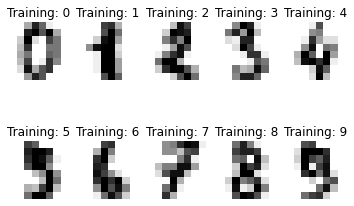

In [4]:
### Let's check FIRST 10 images in the dataset
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

*** Split data - Train/Test dataset ***

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.size)

86208


*** Run-1 ML algorithm data***

In [6]:
# Let's based our first model based on Decision Tree
# Ignore details or syntax for now
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

***Check the accuracy of model-1***

In [7]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print( "Decision Tree score: %.3f" % (accuracy_score(y_test, y_pred)))

Decision Tree score: 0.849


*** Run-2 ML algorithm data ***

In [8]:
# Let's check with another classifier - model based on KN
# Ignore details or syntax for now
from sklearn.neighbors import KNeighborsClassifier

kclf = KNeighborsClassifier(n_neighbors=5)
kclf.fit(X_train,y_train)

KNeighborsClassifier()

*** Check the accuracy of model-2 ***

In [9]:
y_pred = kclf.predict(X_test)
print( "Nearest neighbors: %.3f" %(accuracy_score(y_test, y_pred)))

Nearest neighbors: 0.984


In [10]:
# So we do have clear improvement of accuracy with model change itself. We will cover details of model selection later. 
# Let's analyze the result if this is really good or not?

*** Classification Report ***

In [11]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.93      0.98      0.95        41
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        42
           4       0.98      0.98      0.98        52
           5       0.96      1.00      0.98        46
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        40
           8       1.00      0.92      0.96        39
           9       1.00      0.96      0.98        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450




*** Confused Digits ***

In [12]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  1  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  1  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  0  1  0  0  0  0 36  0]
 [ 0  0  0  0  1  1  0  0  0 43]]


In [13]:
# lets see top 3 pairs of digits that are hardest for the classifier to tell apart.

import collections as cl
import itertools as it

y1 = y_test[np.where(y_test!=y_pred)]
y2 = y_pred[np.where(y_test!=y_pred)]
pairsErrored = np.array(list(zip(y1,y2)))

counts = cl.Counter()
for sublist in pairsErrored:
    counts.update(it.combinations(sublist, 2))

print (counts.most_common()[:3])

[((8, 1), 2), ((8, 3), 1), ((1, 5), 1)]


In [14]:
# Looks like there is room for improvment. though the accuracy score was high, the confusion matrix shares some errors.

# Let's see if we can fine tune KNN paramters and have further better results

*** Fine tune parameters ***

**** Cross Validation ****

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

neighbors = list(range(1,8))
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    print(scores)
    cv_scores.append(scores.mean())

# check cv_scores
best_k_index = np.where(cv_scores == np.max(cv_scores))

#offset by 1 as index are 0 based and k will start from 1
best_k = best_k_index[0][0] + 1
print("Best score for neighbour: %f" %best_k)

# Train the model
clf = KNeighborsClassifier(n_neighbors=best_k)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Performance
print("Accuracy: %f"%accuracy_score(y_test, y_pred))

[0.99206349 0.96825397 0.98412698 0.98412698 0.96825397 1.
 0.98412698 0.992      0.992      0.968     ]
[0.99206349 0.97619048 0.98412698 0.98412698 0.96825397 0.99206349
 0.97619048 0.992      0.984      0.968     ]
[0.99206349 0.98412698 0.98412698 0.99206349 0.97619048 0.98412698
 0.97619048 0.984      0.992      0.984     ]
[0.99206349 0.97619048 0.97619048 0.98412698 0.96031746 0.98412698
 0.96825397 0.984      0.992      0.976     ]
[0.99206349 0.97619048 0.99206349 0.98412698 0.95238095 0.99206349
 0.96825397 0.976      0.992      0.984     ]
[0.99206349 0.97619048 0.97619048 0.98412698 0.95238095 0.99206349
 0.97619048 0.968      0.992      0.976     ]
[0.99206349 0.97619048 0.98412698 0.99206349 0.95238095 0.99206349
 0.97619048 0.976      0.992      0.976     ]
Best score for neighbour: 3.000000
Accuracy: 0.985185


In [16]:
# seems optimum n=1 from above trials

In [17]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[49  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  1  1]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  1]
 [ 0  2  0  1  0  0  0  0 53  0]
 [ 0  0  0  0  1  0  0  0  0 56]]


**** GridSearchCV ****

In [18]:
# We tune both the number of neighbors and the norm used for the distance.
# We will mix cross-validation too
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#All 5x2 = 10 combinations of parameter values will be evaluated.
parameters = {'n_neighbors':[1,2,3,4,5], 'p':[1, 2]}
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10) 
# best_model = clf.fit(X,y) #Searches for the model with the best parameters
clf.fit(X,y)
best_model=clf.best_estimator_

In [19]:
## We see that best parameters are n_neighbors=3 and p=2.
best_model

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Train the model
clf = KNeighborsClassifier(n_neighbors=3,p=2)  
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Performance
print("Accuracy: %f"%accuracy_score(y_test, y_pred))

Accuracy: 0.985185


In [21]:
## Confused pair of digits
from sklearn.metrics import confusion_matrix

num_labels = 10
cm = confusion_matrix(y_test, y_pred)
err_count={}

for i in range(num_labels):
    for j in range(i):
        err_count[(i,j)] = cm[i][j] + cm[j][i]

highest_count = max(err_count.items(), key=(lambda x: x[1]))[1] 
confused_pairs = [k for k,v in err_count.items() if v == highest_count]

print("The following pairs where confused %d times: "%highest_count, end='')
print( *confused_pairs , sep=",")

The following pairs where confused 2 times: (8, 1),(8, 3)


In [22]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[49  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  1  1]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  1]
 [ 0  2  0  1  0  0  0  0 53  0]
 [ 0  0  0  0  1  0  0  0  0 56]]


In [23]:
#another way
y1 = y_test[np.where(y_test!=y_pred)]
y2 = y_pred[np.where(y_test!=y_pred)]
pairsErrored = np.array(list(zip(y1,y2)))

counts = cl.Counter()
for sublist in pairsErrored:
    counts.update(it.combinations(sublist, 2))

print (counts.most_common()[:3])

[((8, 1), 2), ((9, 4), 1), ((3, 9), 1)]


In [24]:
# We tried fine tuning and had preety decent results.